<!--TABLE OF CONTENTS-->
Contents:
- [Decision trees](#Decision-trees)
  - [Visualizing decision tree](#Visualizing-decision-tree)
  - [Visualizing decision boundary](#Visualizing-decision-boundary)
  - [Hyperparameter tuning for trees](#Hyperparameter-tuning-for-trees)
  - [Feature importance](#Feature-importance)
  - [Decision tree for regression](#Decision-tree-for-regression)
  - [Practice question](#Practice-question)
- [Ensemble Methods](#Ensemble-Methods)
  - [Voting classifiers](#Voting-classifiers)
  - [Bagging](#Bagging)
    - [Out-of-Bag evaluation](#Out-of-Bag-evaluation)
    - [Random Forest](#Random-Forest)
  - [Boosting](#Boosting)
    - [Gradient Boosting](#Gradient-Boosting)
    - [Histogram-Based Gradient Boosting](#Histogram-Based-Gradient-Boosting)
    - [XGBoost](#XGBoost)
    - [LightGBM](#LightGBM)
    - [CatBoost](#CatBoost)
- [Imbalanced classification](#Imbalanced-classification)
  - [Under-sampling](#Under-sampling)
  - [Over-sampling](#Over-sampling)
  - [SMOTE](#SMOTE)
    - [Numerical variables](#Numerical-variables)
    - [Categorical variables](#Categorical-variables)
    - [Mixed data types](#Mixed-data-types)
  - [Adjusting weights of the minority class](#Adjusting-weights-of-the-minority-class)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.inspection import DecisionBoundaryDisplay

# Decision trees

Part of this section is from: https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html

First we will use a decision tree for classification of a small synthetic dataset. As we have done before, we will use `make_blobs` method from `sklearn` to generate our data. 
`make_blobs()` has a parameter *n_features* (the number of features for each sample), and its default value is 2.
We will be creating our data *X* with 2 features, and *y* will correspond to the label of the cluster to which a point belongs. 
Then, we will visualize our data with scatter plot. 

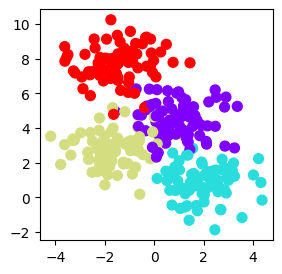

In [6]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1)
fig = plt.figure(figsize=(3,3))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

Note that we have used one additional parameter in the scatter plot, *cmap*, which defined the colormap. Here are some different choices for the color scheme: 
https://matplotlib.org/stable/tutorials/colors/colormaps.html

Let's confirm the size of our data.

In [9]:
X.shape

(300, 2)

Let's see the distribution of classes:

In [11]:
Counter(y)

Counter({1: 75, 3: 75, 0: 75, 2: 75})

Next we will fit a decision tree for classification.
The full list of the parameters is available in the documentation: \
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


Note that by default, the criterion for finding the best splits is Gini index.
The parameter which controls this is 
*criterion* , default=*gini*, it can be set to *entropy*.
Let's first plot a smaller tree for easier visualization, we will set the depth of the tree as 3.

In [13]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X, y)

DecisionTreeClassifier(max_depth=3)

The decision classifier has an attribute called *tree_* which allows access to low level attributes such as *node_count*,
the total number of nodes, and *max_depth*, the maximal depth of the tree. It also stores the entire binary tree structure,
More details in:

https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html
    
Let's see the total number of nodes and the depth of a tree.

In [15]:
print('number of nodes is ', tree.tree_.node_count)
print('depth of the tree is ', tree.tree_.max_depth)

number of nodes is  9
depth of the tree is  3


## Visualizing decision tree

Let's now see our constructed tree.

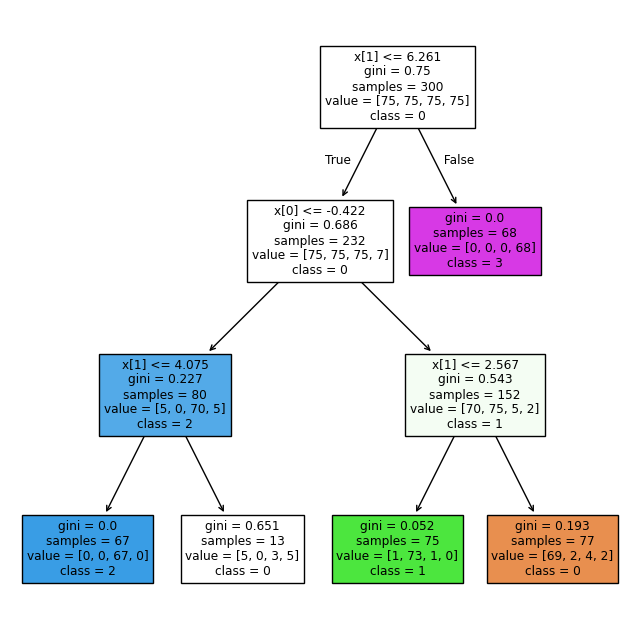

In [18]:
plt.figure(figsize=(8,8))
plot_tree(tree, class_names=['0','1','2','3'], filled=True)
plt.show()

Each box in the plot represents a node. Let's look at the root node output.

First line of the output: X[1]>=6.6261 is the first split. Based on the result, it either follows the true (left) or the false (right) path.

*gini = 0.75*: The gini score is a metric that quantifies the purity of the node/leaf. A gini score greater than zero implies that the samples contained within that node belong to different classes. A gini score of 0 means that the node is pure, that within that node only a single class of data points exist. 
Notice that we have a gini score greater than zero. Therefore, we know that the data points contained within the root node belong to different classes.

*samples = 300*: Since our dataset set contains 300  data points, this value is set to 300.

*value = [75, 75, 75, 75]*: The value list tells us how many samples at the given node fall into each class. The first element of the list shows the number of points that belong to class 0, the second element of the list shows the number of points that belong to class 1,... Notice how this node is not a pure one since different types of classes are contained within the same node. We knew this already from the gini score.

*class* = 0: The class value shows the prediction a given node will make and it can be determined from the value list. Whichever class occurs the most within the node will be selected as the class value. If the decision tree were to end at the root node, it would predict that all 300 samples belonged to class 0. 
Of course this makes no sense, since there is an equal number of samples for each class, but the decision tree is programmed to choose the first class on the list if there is an equal number of samples for each class.

Note that for this exercise, we are not splitting the data into train and test. 
We will not be evaluating the classifier performance on the test set, or tuning the hyperparameters.
The goal of this part is only to visualize and understand the tree performance.

## Visualizing decision boundary

Next, we will use the visualize the decision regions just like we did for the other classifiers.

Let's now see our classifier.

Text(0.5, 1.0, 'Decision Tree of depth 3')

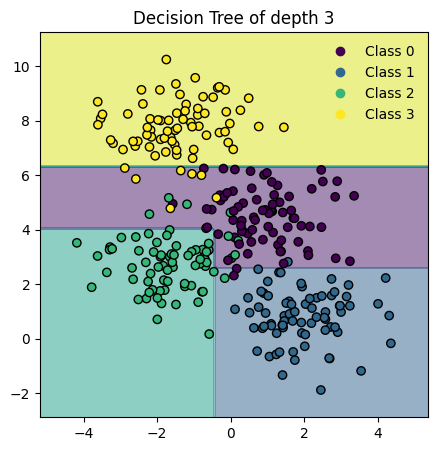

In [24]:
plt.figure(figsize=(5,5))
ax = plt.axes()
disp = DecisionBoundaryDisplay.from_estimator(tree, X, response_method="predict", alpha=0.5, ax=ax)
scatter=ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
handles, labels = scatter.legend_elements()
ax.legend(handles=handles, labels=["Class " + str(k) for k in range(0,4)], frameon=False)
ax.set_title("Decision Tree of depth 3")

Notice that the decision boundaries are perpendicular to the axes. 

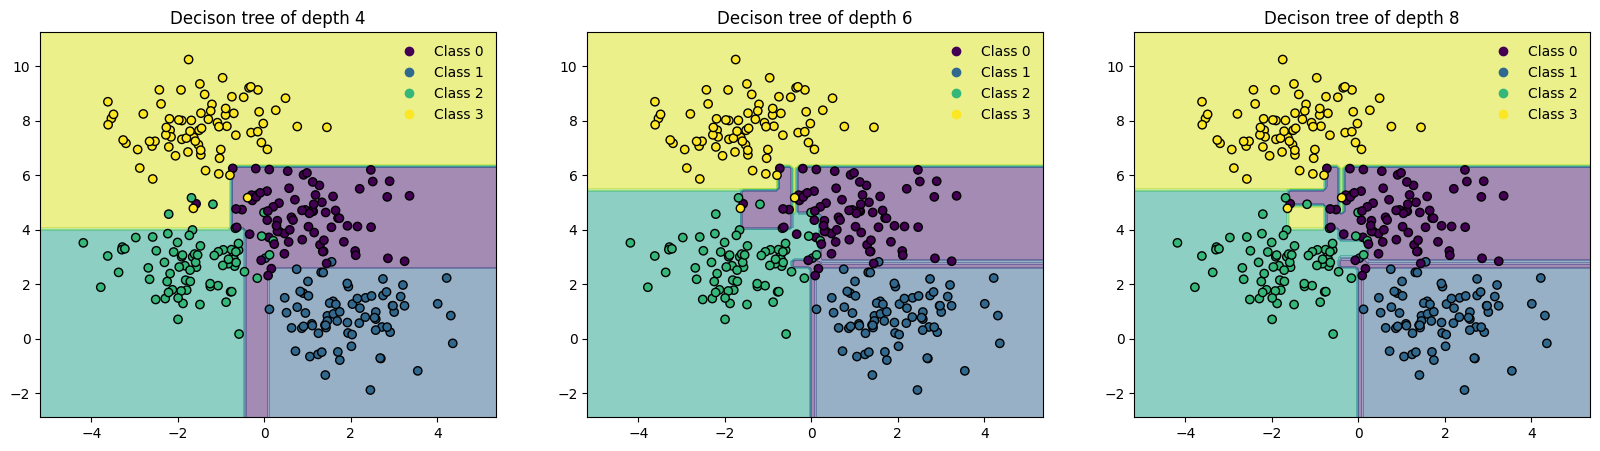

In [26]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

for depth, ax in zip(range(4,9,2), axs):
        tree = DecisionTreeClassifier(max_depth=depth)
        tree.fit(X, y)
        disp = DecisionBoundaryDisplay.from_estimator(tree, X, response_method="predict", alpha=0.5, ax=ax)
        scatter=ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
        handles, labels = scatter.legend_elements()
        ax.legend(handles=handles, labels=["Class " + str(k) for k in range(0,4)], frameon=False)
        ax.set_title(f"Decison tree of depth {depth}")


Let's visualize decision boundaries for trees of varying depth.

Notice that as the depth increases, we tend to get very strangely shaped classification regions; 
for example, for depth 4, there is a tall and skinny purple region between the green and blue regions.
It's clear that this is less a result of the true data distribution, and more a result of the particular sampling or noise properties of the data.
That is, this decision tree, even at only 4 levels deep, is clearly over-fitting our data. Such over-fitting turns out to be a general property of decision trees: it is very easy to go too deep in the tree, and thus to fit details of the particular data rather than the overall properties of the distributions they are drawn from. 

Another way to see this over-fitting is to look at models trained on different subsets of the data, for example, if we train two different trees, each on half of the original data.

Recall that on numpy arrays slicing (taking elements from one given index to another given index) is done [start:end:step], so taking every other element is done as X[::2] (equivalent to X[0::2]), starting from the first element, index 0. Remember that the second element has index 1.

If we do not specify the maximum depth of a tree, the default value is *None*, meaning that the nodes are expanded until all leaves are pure or until all leaves contain less than *min_samples_split* samples (which has a default value of 2).

Text(0.5, 1.0, 'Decision Tree trained on the other half of the data')

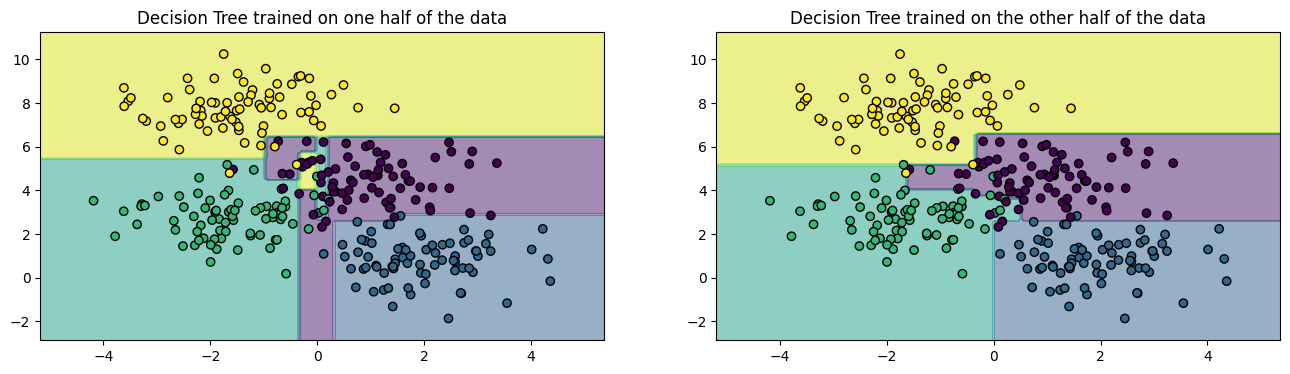

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(16, 4))
tree1 = DecisionTreeClassifier().fit(X[::2], y[::2])
tree2 = DecisionTreeClassifier().fit(X[1::2], y[1::2])

disp = DecisionBoundaryDisplay.from_estimator(tree1, X, response_method="predict", alpha=0.5, ax=axs[0])
scatter=axs[0].scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
axs[0].set_title("Decision Tree trained on one half of the data")

disp = DecisionBoundaryDisplay.from_estimator(tree2, X, response_method="predict", alpha=0.5, ax=axs[1])
scatter=axs[1].scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
axs[1].set_title("Decision Tree trained on the other half of the data")

It is clear that in some places, the two trees produce consistent results (e.g., in the four corners), while in other places, the two trees give very different classifications (e.g., in the regions between any two classes). The key observation is that the inconsistencies tend to happen where the classification is less certain, and thus by using information from both of these trees, we might come up with a better result. We will cover multiple trees further on in this notebook. Here we see that with slightly different data set we obtain a different model, so we have a high variance with higher depth tree.

## Hyperparameter tuning for trees

Let's import the familiar dataset `breast_cancer` from sklearn datasets.

In [34]:
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True, as_frame=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

All the features are numerical. Let's check descriptive statistics.

In [36]:
X.describe().T

count        mean         std         min  \
mean radius              569.0   14.127292    3.524049    6.981000   
mean texture             569.0   19.289649    4.301036    9.710000   
mean perimeter           569.0   91.969033   24.298981   43.790000   
mean area                569.0  654.889104  351.914129  143.500000   
mean smoothness          569.0    0.096360    0.014064    0.052630   
mean compactness         569.0    0.104341    0.052813    0.019380   
mean concavity           569.0    0.088799    0.079720    0.000000   
mean concave points      569.0    0.048919    0.038803    0.000000   
mean symmetry            569.0    0.181162    0.027414    0.106000   
mean fractal dimension   569.0    0.062798    0.007060    0.049960   
radius error             569.0    0.405172    0.277313    0.111500   
texture error            569.0    1.216853    0.551648    0.360200   
perimeter error          569.0    2.866059    2.021855    0.757000   
area error               569.0   40.337079   45.491006    6.802000   
smoothness error         569.0    0.007041    0.003003    0.001713   
compactness error        569.0    0.025478    0.017908    0.002252   
concavity error          569.0    0.031894    0.030186    0.000000   
concave points error     569.0    0.011796    0.006170    0.000000   
symmetry error           569.0    0.020542    0.008266    0.007882   
fractal dimension error  569.0    0.003795    0.002646    0.000895   
worst radius             569.0   16.269190    4.833242    7.930000   
worst texture            569.0   25.677223    6.146258   12.020000   
worst perimeter          569.0  107.261213   33.602542   50.410000   
worst area               569.0  880.583128  569.356993  185.200000   
worst smoothness         569.0    0.132369    0.022832    0.071170   
worst compactness        569.0    0.254265    0.157336    0.027290   
worst concavity          569.0    0.272188    0.208624    0.000000   
worst concave points     569.0    0.114606    0.065732    0.000000   
worst symmetry           569.0    0.290076    0.061867    0.156500   
worst fractal dimension  569.0    0.083946    0.018061    0.055040   

                                25%         50%          75%         max  
mean radius               11.700000   13.370000    15.780000    28.11000  
mean texture              16.170000   18.840000    21.800000    39.28000  
mean perimeter            75.170000   86.240000   104.100000   188.50000  
mean area                420.300000  551.100000   782.700000  2501.00000  
mean smoothness            0.086370    0.095870     0.105300     0.16340  
mean compactness           0.064920    0.092630     0.130400     0.34540  
mean concavity             0.029560    0.061540     0.130700     0.42680  
mean concave points        0.020310    0.033500     0.074000     0.20120  
mean symmetry              0.161900    0.179200     0.195700     0.30400  
mean fractal dimension     0.057700    0.061540     0.066120     0.09744  
radius error               0.232400    0.324200     0.478900     2.87300  
texture error              0.833900    1.108000     1.474000     4.88500  
perimeter error            1.606000    2.287000     3.357000    21.98000  
area error                17.850000   24.530000    45.190000   542.20000  
smoothness error           0.005169    0.006380     0.008146     0.03113  
compactness error          0.013080    0.020450     0.032450     0.13540  
concavity error            0.015090    0.025890     0.042050     0.39600  
concave points error       0.007638    0.010930     0.014710     0.05279  
symmetry error             0.015160    0.018730     0.023480     0.07895  
fractal dimension error    0.002248    0.003187     0.004558     0.02984  
worst radius              13.010000   14.970000    18.790000    36.04000  
worst texture             21.080000   25.410000    29.720000    49.54000  
worst perimeter           84.110000   97.660000   125.400000   251.20000  
worst area               515.300000  686.500000  1084.

In [37]:
y.value_counts()

target
1    357
0    212
Name: count, dtype: int64

Let's check do we have any missing data.

In [39]:
X.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

Let's split our data into test and train, leaving 20% of data for testing.

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(455, 30)
(455,)
(114, 30)
(114,)


Now, let's tune our tree using randomized search cross validation on the train set, and evaluate its performance on the test set.
We will optimize several decision tree parameters:

- *criterion* {"gini", "entropy"}, default="gini"
The function to measure the quality of a split. Supported criteria are "gini" for the Gini impurity and "entropy" for the information gain. In practice, both the Gini impurity and entropy typically yield very similar results.

- *max_depth*  specifies the maximum depth of the tree. The default is None.

- *min_samples_leaf*  int or float, default=1, specifies the minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least *min_samples_leaf training* samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

Note that we are not doing feature scaling, since decision trees do not require it, as this is not a distance based method. As the scoring function we will use f1 score. (Recall that the metric depends on the problem we are trying to solve, so here f1 is just as an example). 

In [44]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [45]:
distributions= dict(max_depth=randint(1, 10), 
                    min_samples_leaf=randint(1, 10), 
                    criterion= ["gini", "entropy"] )

Above we used the `randint()` method which returns an integer number selected element from the specified range.

In [47]:
tree = DecisionTreeClassifier()
random_search = RandomizedSearchCV(tree, distributions, n_iter=20, random_state=1, cv=10, scoring='f1', n_jobs=-1)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000019B78868320>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000019B7891A630>},
                   random_state=1, scoring='f1')

Above we specified that we want to test 20 different parameter combinations, where we could either use gini or entropy as the splitting criteria, the tree could be of depth between 1 and 10, and the minimum number of samples required to be at a leaf node would be a random number from the range 1 to 10.
Let's see what parameter combinations were generated. We will look at the *cv_results_* once again.

In [49]:
results = pd.DataFrame(random_search.cv_results_)

Now, let's see the value of the column with the tested parameters, *params*. We will sort the results:

In [51]:
sorted(results.params, key=lambda x: (x['criterion'], x['max_depth'], x['min_samples_leaf']))

[{'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 1},
 {'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 5},
 {'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 7},
 {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 1},
 {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 5},
 {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 8},
 {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 5},
 {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 2},
 {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 7},
 {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 7},
 {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 6},
 {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 7},
 {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5},
 {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 9},
 {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5},
 {'criterion': 'gin

Let's see what are the best parameters:

In [53]:
random_search.best_params_

{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 3}

And let's see what is the best f1 score of cross validation:

In [55]:
random_search.best_score_

0.9546061823172776

Let's plot look at the evaluation metrics of our tuned tree on the test data.

In [57]:
from sklearn.metrics import classification_report
y_pred=random_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92        43
           1       0.94      0.96      0.95        71

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



Let's look at our ROC plot.

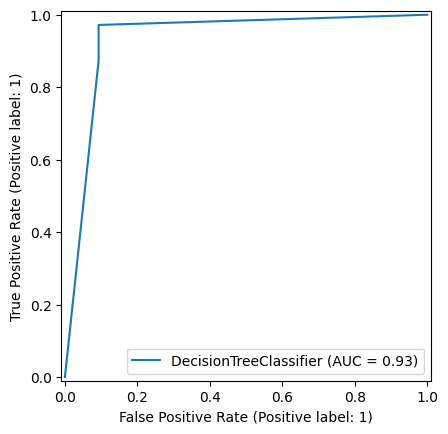

In [59]:
from sklearn.metrics import RocCurveDisplay 
RocCurveDisplay.from_estimator(random_search.best_estimator_, X_test, y_test)

Given that this is a simple problem, we have obtained very good results, with AUC of 0.95.

## Feature importance

Let us first plot a very simple tree only of depth 1.

[Text(0.5, 0.75, 'x[7] <= 0.051\nentropy = 0.952\nsamples = 455\nvalue = [169, 286]\nclass = 1'),
 Text(0.25, 0.25, 'entropy = 0.314\nsamples = 282\nvalue = [16, 266]\nclass = 1'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'entropy = 0.517\nsamples = 173\nvalue = [153, 20]\nclass = 0'),
 Text(0.625, 0.5, '  False')]

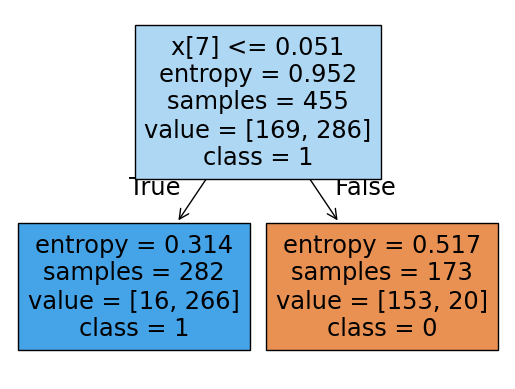

In [63]:
tree = DecisionTreeClassifier(max_depth=1, criterion='entropy').fit(X_train, y_train)
plot_tree(tree, class_names=['0','1'], filled=True)

We can see that the 8th feature was the most informative feature for the single split (the split looks at x[7]). Let's see what that feature is:

In [65]:
X.columns[7]

'mean concave points'

Instead of looking at splits for the whole tree, which can be difficult for trees of higher length, there are some useful properties that we can derive to summarize the workings of the tree. The most commonly used summary is feature importance, which rates how important each feature is for the decision a tree makes. It is a number between 0 and 1 for each feature, where 0 means "not used at all: and 1 means "perfectly predicts the target". The values of feature importance always sum to 1. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.

In [67]:
importance=random_search.best_estimator_.feature_importances_
importance

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.72035249, 0.        , 0.        ,
       0.01248399, 0.        , 0.        , 0.        , 0.00128767,
       0.        , 0.        , 0.        , 0.        , 0.0127925 ,
       0.05448777, 0.06153931, 0.05364876, 0.        , 0.00495046,
       0.        , 0.        , 0.06839799, 0.        , 0.01005906])

We can visualize the feature importances using matplotlib's horizontal bar plot *barh*:

Text(0, 0.5, 'Feature')

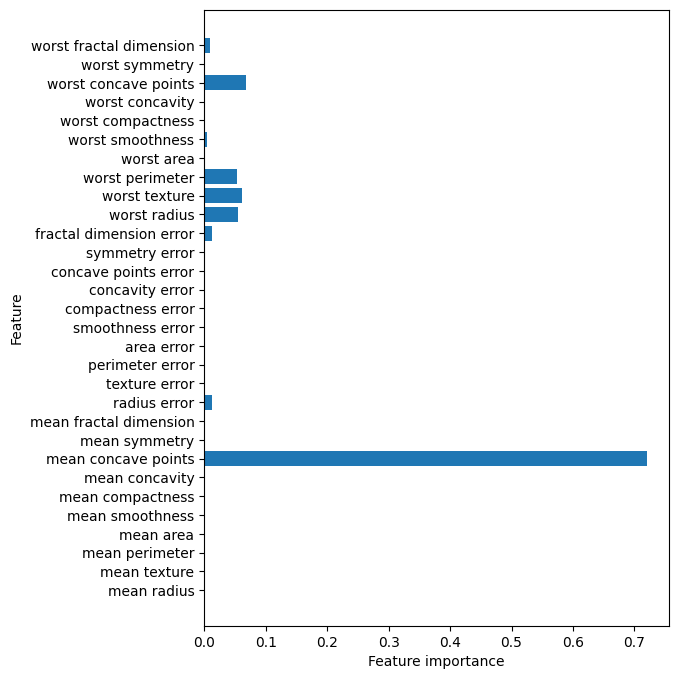

In [69]:
plt.figure(figsize=(6,8))
n_features =X.shape[1]
plt.barh(range(n_features), importance, align='center')
plt.yticks(np.arange(n_features), X.columns)
plt.xlabel('Feature importance')
plt.ylabel('Feature')

Here we see that the feature used in the top split, *mean concave points*, is by far the most important feature. This confirms our observation in analyzing the tree that the first level already separates the two classes fairly well.
However, if a feature has a low *feature_importance*, it doesn't mean that this feature is uninformative. It only means that the feature was not picked by the tree, maybe because another feature encodes the same information.
In contrast to the coefficients in linear models, feature importances are always positive, and do not encode which class a feature is indicative of. The feature importances tell us that *mean concave points* is important, but not whether a high value of this variable is indicative of a sample being benign or malignant. We will study in more depth feature importance when we discuss model interpretability.

## Decision tree for regression

In decision trees for classification, Gini index and entropy are used as a measure of impurity to determine which feature split maximizes the information gain. However, in decision trees for regression, the impurity metric used is the mean squared error, and the predicted value is the mean of the target values of the data points associated with the leaf.

To illustrate the use of decision trees for regression we will use the Ames Housing dataset. We will download the dataset directly using the pandas *read_csv* function, and instead of providing the file path as the input parameter, we will provide the URL. Since this dataset has 81 features, we will load only one feature and the target for illustrative purpose.

In [74]:
columns = ['Gr Liv Area', 'SalePrice']
df = pd.read_csv('http://jse.amstat.org/v19n3/decock/AmesHousing.txt', sep='\t', usecols=columns)
df.head()

Gr Liv Area  SalePrice
0         1656     215000
1          896     105000
2         1329     172000
3         2110     244000
4         1629     189900

Now let's use the *DecisionTreeRegressor* to model the relationship between the target, SalePrice and Gr Living Area variable. We will not split the dataset into training and test as we should do for actual application.  

In [76]:
from sklearn.tree import DecisionTreeRegressor
X = df[['Gr Liv Area']] 
y = df['SalePrice']
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)

DecisionTreeRegressor(max_depth=3)

In [77]:
print('number of nodes is ', tree.tree_.node_count)

number of nodes is  15


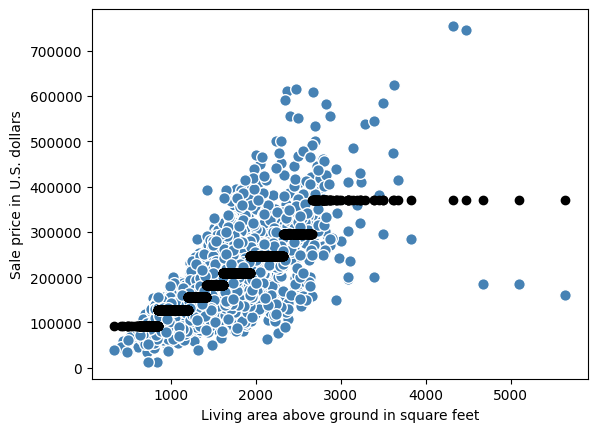

In [78]:
plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
plt.scatter(X, tree.predict(X), color='k')
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')
plt.show()

As we can see in the resulting plot, the decision tree captures the general trend in the data. However, a limitation of this model is that it does not capture the continuity of the desired prediction. In addition, we need to be careful about choosing an appropriate value for the depth of the tree so as to not overfit or underfit the data. Here, a depth of three seemed to be a good choice.
Note that there are only 9 possible target values predicted by this tree (by counting the different y values of the predictions, black points). This means that the tree has 9 leaves. We can confirm this by using the *apply* method for the tree, which returns the index of the leaf that each sample is predicted as. To get only the unique value of these indices, we will use *set* method.

In [80]:
leaves_index = tree.apply(X) 
set(leaves_index)

{3, 4, 6, 7, 10, 11, 13, 14}

Note that the numbers are not consecutive, as not all of the 15 nodes of the tree are leaf nodes.

## Practice question
Load the iris dataset, split it into train and test, use cross validation on the train set to tune the tree hyperparameters. Evaluate the performance and visualize the selected tree.

# Ensemble Methods

First install `pip install xgboost lightgbm catboost`. 

If incompatibilities between xgboost and scikit-learn arise, please update to the latest versions.

The goal of ensemble methods is to combine different classifiers into a meta-classifier that has better generalization performance than each individual classifier alone. There are several different 
approaches for creating an ensemble of classifier, as we will see throughout this notebook..

## Voting classifiers

A very simple way to create a better classifier is to aggregate the predictions of each classifier and predict the class that gets the most votes. The *VotingClassifier* takes in a list of different estimators as arguments and a voting method. The *hard* voting method uses the predicted labels and a majority rules system, while the *soft* voting method chooses a class that gives the largest predicted value of the sum () of the predicted probabilities.

Let's first make a small synthetic dataset, and split it into train and test.

In [88]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0,  n_classes=2,
                            n_clusters_per_class=1,   class_sep=0.2, random_state=123)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

After defining the classifiers, we need to fit the resulting ensemble classifier object. 

In [91]:
voting = VotingClassifier(
    [('logreg', LogisticRegression(C=1, solver='liblinear')),
     ('tree', DecisionTreeClassifier(max_depth = 3, random_state=0))],
    voting='hard')
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('logreg',
                              LogisticRegression(C=1, solver='liblinear')),
                             ('tree',
                              DecisionTreeClassifier(max_depth=3,
                                                     random_state=0))])

One attribute of the `VotingClassifier` is `estimators_` which returns the collection of fitted sub-estimators, in the order we specified them.
Let's check the accuracy of the individual estimators and the ensemble. 
Recall that `sklearn` estimators have a  `score` method providing a default evaluation criterion for the problem they are designed to solve. In the case of each of the classifiers above, the `score` returns the accuracy on the given test data and labels.

In [93]:
lr, tree = voting.estimators_
print('Accuracy of Logistic Regression', lr.score(X_test, y_test))
print('Accuracy of Decision Tree', tree.score(X_test, y_test))
print('Accuracy of the voting ensemble',voting.score(X_test, y_test))

Accuracy of Logistic Regression 0.792
Accuracy of Decision Tree 0.776
Accuracy of the voting ensemble 0.8


Again, we will use *DecisionBoundaryDisplay.from_estimator* to visualize the decision boundary of the subestimators and the ensemble.

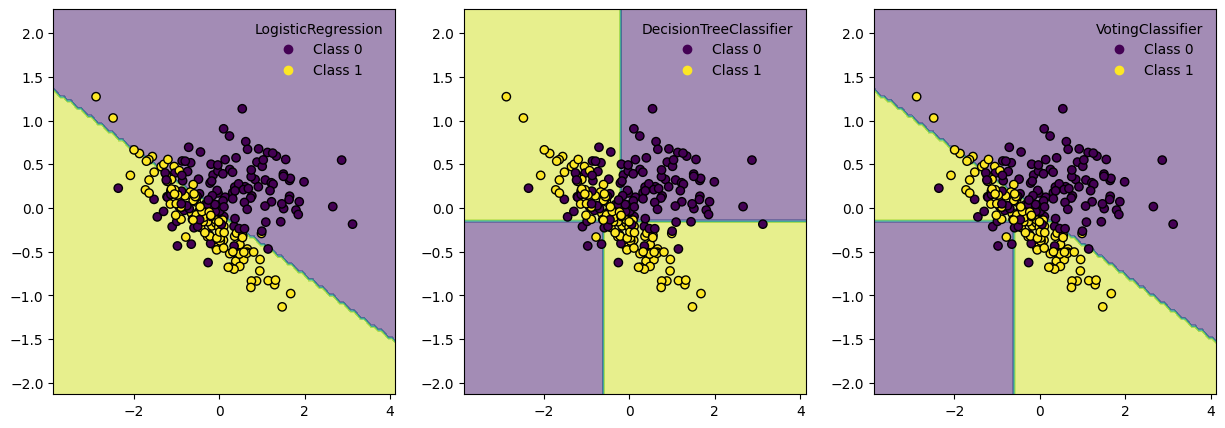

In [95]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for classifier, ax in zip([lr, tree, voting], axs):
        disp = DecisionBoundaryDisplay.from_estimator(classifier, X_test, response_method="predict", alpha=0.5, ax=ax)
        scatter=ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor="k")
        handles, labels = scatter.legend_elements()
        ax.legend(handles=handles, labels=["Class 0", "Class 1"], title=f"{classifier.__class__.__name__}", frameon=False)

Note that we used  the expression `estimator.__class__.__name__ ` to obtain the name of the class to which an estimator (a model or transformer) belongs, as a string.
Looking at the plots, we can see the liner decision boundary of the logistic regression, decision boundary of the tree orthogonal to the axes, and the final decision boundary of the voting classifier, as a combination of the two classifiers.

If all classifiers are able to estimate class probabilities (i.e., they have a *predict_proba()* method), we can use *sklearn* to predict the class with the highest class probability, averaged over all the individual classifiers. This is called *soft* voting. It often achieves higher performance than hard voting because it gives more weight to highly confident votes. All we need to do is replace *voting="hard"* with *voting="soft"* and ensure that all classifiers can estimate class probabilities. 

In [98]:
voting = VotingClassifier(
    [('logreg', LogisticRegression(C=1,solver='liblinear')),
     ('tree', DecisionTreeClassifier(max_depth=3, random_state=0))],
    voting='soft')
voting.fit(X_train, y_train)
lr, tree = voting.estimators_
print('Accuracy of Logistic Regression', lr.score(X_test, y_test))
print('Accuracy of Decision Tree', tree.score(X_test, y_test) )
print('Accuracy of the voting ensemble', voting.score(X_test, y_test) )

Accuracy of Logistic Regression 0.792
Accuracy of Decision Tree 0.776
Accuracy of the voting ensemble 0.8


In this case using class probabilities gave same results as using labels, and our voting classifier still has higher accuracy than the base classifiers.

## Bagging

The following follows: https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html

One way to get a diverse set of classifiers is to use very different training algorithms as just discussed. Another approach is to use the same training algorithm for every predictor, but to train them on different random subsets of the training set. When sampling is performed with replacement, this method is called bagging (short for bootstrap aggregating). Bagging allows training instances to be sampled several times for the same predictor.

Once all predictors are trained, the ensemble can make a prediction for a new instance by simply aggregating the predictions of all predictors. The aggregation function is typically the statistical mode (i.e., the most frequent prediction, just like a hard voting classifier) for classification, or the average for regression. Generally, the net result is that the ensemble has a similar bias but a lower variance than a single predictor trained on the original training set.
Bagging makes use of an ensemble  of parallel estimators, each of which overfits the data, and averages the results to find a better classification. An ensemble of randomized decision trees is known as a random forest.

Let's first generate and visualize a small synthetic dataset with two features using `make_blobs`.

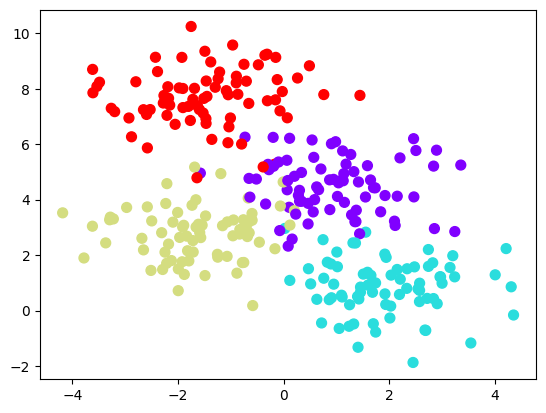

In [102]:
X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

Let's check number of members of each class:

In [104]:
sorted(Counter(y).items())

[(0, 75), (1, 75), (2, 75), (3, 75)]

Let's fit a simple decision tree and visualize the decision boundaries.

Text(0.5, 1.0, 'Single decision tree')

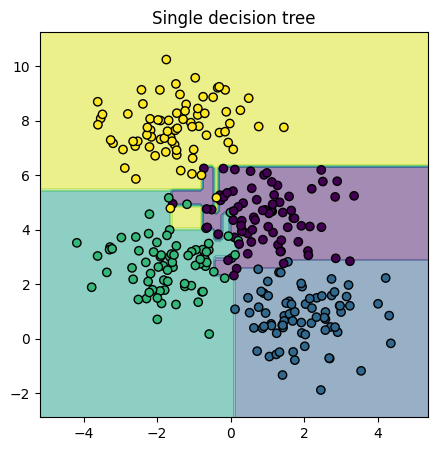

In [106]:
plt.figure(figsize=(5,5))
ax = plt.axes()
tree = DecisionTreeClassifier()
tree.fit(X, y)
disp = DecisionBoundaryDisplay.from_estimator(tree, X, response_method="predict", alpha=0.5, ax=ax)
scatter=ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
handles, labels = scatter.legend_elements()
ax.set_title("Single decision tree")

Bagging classification can be done manually using *sklearn*'s *BaggingClassifier* meta-estimator, as shown here:

Text(0.5, 1.0, 'Ensemble of trees by bagging')

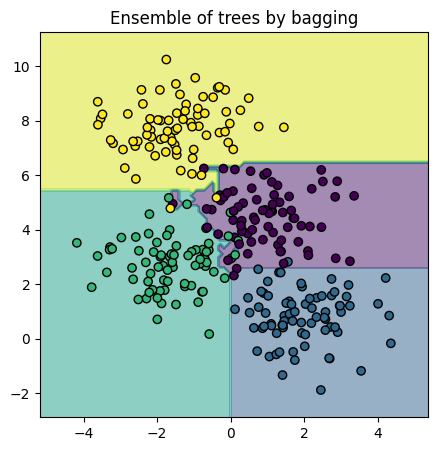

In [108]:
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1)
bag.fit(X, y)

plt.figure(figsize=(5,5))
ax = plt.axes()
disp = DecisionBoundaryDisplay.from_estimator(bag, X, response_method="predict", alpha=0.5, ax=ax)
scatter=ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
handles, labels = scatter.legend_elements()
ax.set_title("Ensemble of trees by bagging")

In this example, we have randomized the data by fitting each estimator with a random subset of 80% of the training points. Then the final decision is based on voting (since this is classification, and if it was regression, it would be based on averaging). The default value of the parameter *bootstrap* is True, meaning, unless specified differently, samples are drawn with replacement. 

### Out-of-Bag evaluation

With bagging, some instances may be sampled several times for any given predictor, while others may not be sampled at all. By default a `BaggingClassifier` samples `max_samples` training instances with replacement (`bootstrap=True`), where `max_samples` is the size of the training set (can be set as a number or as a percentage of samples). This means that only about 63% of the training instances are sampled on average for each predictor. The remaining around 37% of the training instances that are not sampled are called out-of-bag (oob) instances. Note that they are not the same 37% for all predictors.

This is because the probability of selecting a given instance is $\dfrac{1}{n}$, and the probability of not selecting said instance is $\left(1 - \dfrac{1}{n}\right)$; then the probability of the instance not being selected n times, i.e., not being selected at all for any predictor during bootstrap sampling is $\left(1 - \dfrac{1}{n}\right)^n$. As $n$ approaches infinity, this expression converges to $\dfrac{1}{e} \approx 0.37$.


Since a predictor never sees the oob instances during training, it can be evaluated on these instances, without the need for a separate validation set or cross-validation. We can evaluate the ensemble itself by averaging out the oob evaluations of each predictor. Note that, while  the oob score is calculated using all the trees in the `BaggingClassifier`, each data instance's oob prediction is only made from the trees that did not have that instance in their bootstrap sample. This means that each instance is predicted by a subset of all trees, specifically those for which the instance was out-of-bag. The final oob score is an aggregation (e.g., mean) of these individual oob predictions.

In `sklearn`, we can set `oob_score=True` when creating a `BaggingClassifier` to request an automatic oob evaluation after training. The following code demonstrates this. The resulting evaluation score is available through the `oob_score_` variable:

In [111]:
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1,  oob_score=True)
bag.fit(X, y)
bag.oob_score_

0.91

Note that this is different than if we simply checked the score of the bagging classifier on the training set X:

In [113]:
bag.score(X,y)

0.9966666666666667

### Random Forest

In the previous example, we have randomized the data by fitting each estimator with a random subset of 80% of the training points. In practice, decision trees are more effectively randomized by injecting some stochasticity in how the splits are chosen.

In *sklearn*, such an optimized ensemble of randomized decision trees is implemented in the *RandomForestClassifier* estimator, which takes care of all the randomization automatically. When splitting each node during the construction of a tree, the best split is found either from all input features or a random subset of defined by the input parameter, *max_features* (default values is square root of the number of features). The *sklearn* implementation combines classifiers by averaging their probabilistic prediction, instead of letting each classifier vote for a single class.

Random Forest implementation also features the parallel construction of the trees and the parallel computation of the predictions through the n_jobs parameter. If *n_jobs=k* then computations are partitioned into k jobs, and run on k cores of the machine. If *n_jobs=-1* then all cores available on the machine are used. Note that because of inter-process communication overhead, the speedup might not be linear (i.e., using k jobs will unfortunately not be k times as fast). Significant speedup can still be achieved though when building a large number of trees, or when building a single tree requires a fair amount of time (e.g., on large datasets).  By default, *n_jobs* parameter has value 1. 

Text(0.5, 1.0, 'Random Forest')

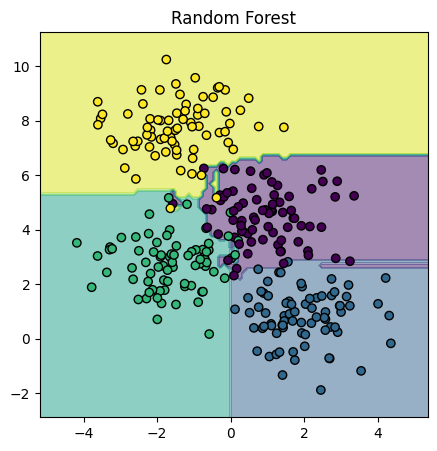

In [116]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X, y)

plt.figure(figsize=(5,5))
ax = plt.axes()
disp = DecisionBoundaryDisplay.from_estimator(model, X, response_method="predict", alpha=0.5, ax=ax)
scatter=ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
handles, labels = scatter.legend_elements()
ax.set_title("Random Forest")

We will use the hand-written digits data to see how the random forest classifier can be used in this context.

In [118]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

Let's visualize the first few digits and their labels, similarly to what we did in Notebook 5:

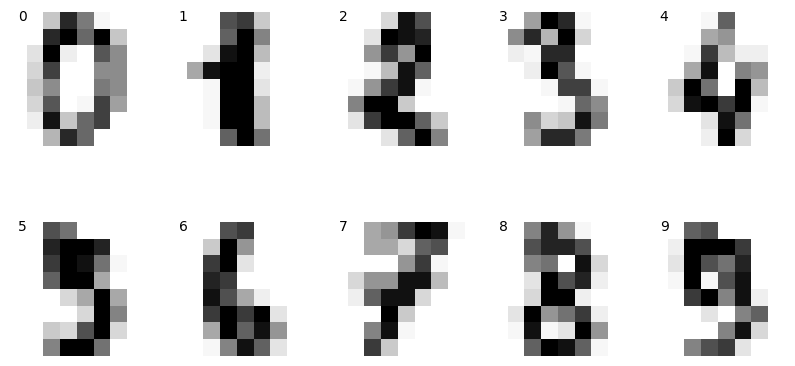

In [120]:
from sklearn.datasets import load_digits
digits = load_digits()
fig, axs = plt.subplots(2, 5, figsize=(10, 5))
for ax, img, target in zip(axs.flat, digits.images, digits.target):
    ax.imshow(img, cmap='Greys')
    ax.axis('off')
    ax.text(0, 0, str(target))

Now, let's use Random Forest.

In [122]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)
model = RandomForestClassifier(n_estimators=1000, oob_score=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

We can take a look at the classification report for this classifier:

In [124]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.98      0.98      0.98        43
           2       0.95      1.00      0.98        42
           3       0.98      0.96      0.97        46
           4       0.97      1.00      0.99        37
           5       0.98      0.96      0.97        49
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.94      0.98      0.96        46
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



Let's also visualize the confusion matrix:

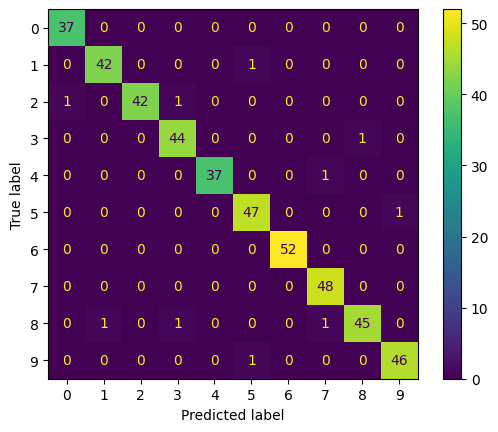

In [126]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

Let's now check out of the estimate of generalization accuracy using out-of-bag samples:

In [128]:
model.oob_score_

0.9732739420935412

We can see that oob samples give us a good estimate: 0.976 is oob_score and accuracy on the test set is 0.98.

We find that a simple, untuned random forest results in a very accurate classification of the digits data.

## Boosting
The general idea of most boosting methods is to train predictors sequentially, each trying to correct its predecessor.
There are many boosting methods available. 

### Gradient Boosting

Gradient Boosting works by sequentially adding predictors to an ensemble, each one correcting its predecessor, by fitting the new predictor to the residual errors made by the previous predictor.

First, let's create a small synthetic dataset using `make_classification`.

In [133]:
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=49)
print(X.shape, y.shape)

(1000, 10) (1000,)


The *sklearn* library provides the GBM algorithm for regression and classification via the `GradientBoostingClassifier` and `GradientBoostingRegressor` classes. 

Much like the `RandomForestClassifier` class, it has hyperparameters to control the growth of Decision Trees (e.g., max_depth, min_samples_leaf, ...), as well as hyperparameters to control the ensemble training, such as the number of trees (n_estimators). 

Let's first fit `GradientBoostingClassifier` without any parameter tuning.

In [135]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)
y_pred_prob= gbc.predict_proba(X_test)
roc_auc_score(y_test, y_pred_prob[:,1]) 

0.9762609366958311

Now, let's tune the model using `RandomizedSearchCV` and check the test error. Note that we are checking the test error for illustrative purposes, and not to do model selection. In practice, **test error is evaluated only once for the final selected model, and no modeling decisions should be based on the test set**.

Recall that in `RandomizedSearchCV`, in contrast to `GridSearchCV`, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions. The number of parameter settings that are tried is given by *n_iter*.
The parameter *n_iter* trades off runtime vs quality of the solution. Here we are not going to use large value of *n_iter* so the code should run relatively quickly. In practice, this value should be higher and more parameters should be optimized, and wider parameter range should be sampled.

Additionally, here we are optimizing using the *scoring='roc_auc'*. The scoring method should be chose carefully, depending on the problem we are solving.

While in this notebook, for simplicity we will only use `RandomizedSearchCV`, there are other more sophisticated methods for parameter tuning, which we covered in the Notebook 3.

In [137]:
from sklearn.model_selection import RandomizedSearchCV  
param_grid = {'learning_rate': [0.1,0.05,0.03,0.01],                              
              'max_depth': [3,5,7],               
              'max_features': [0.6,0.8,1.0],               
              'min_samples_leaf': [1,2,3,5],               
              'n_estimators': [100, 200]            }  
random_search = RandomizedSearchCV(GradientBoostingClassifier(), param_distributions = param_grid, cv=5, 
                                   n_iter=20, random_state=42,scoring='roc_auc', n_jobs=-1) 
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.05, 0.03,
                                                          0.01],
                                        'max_depth': [3, 5, 7],
                                        'max_features': [0.6, 0.8, 1.0],
                                        'min_samples_leaf': [1, 2, 3, 5],
                                        'n_estimators': [100, 200]},
                   random_state=42, scoring='roc_auc')

Let's see the best parameters found by randomized search.

In [139]:
print(random_search.best_params_)

{'n_estimators': 200, 'min_samples_leaf': 2, 'max_features': 0.6, 'max_depth': 7, 'learning_rate': 0.03}


Now, let's evaluate the ROC score of the test set.

In [141]:
y_pred_prob= random_search.best_estimator_.predict_proba(X_test)
roc_auc_score(y_test, y_pred_prob[:,1]) 

0.9879053010808029

### Histogram-Based Gradient Boosting
The `sklearn` library provides an alternate implementation of the gradient boosting algorithm, referred to as histogram-based gradient boosting.

This is an alternate approach to implement gradient tree boosting inspired by the `LightGBM` library. This implementation is provided via the `HistGradientBoostingClassifier` and `HistGradientBoostingRegressor`.

The primary benefit of the histogram-based approach to gradient boosting is speed. These implementations are designed to be much faster to fit on training data.

In [143]:
from sklearn.ensemble import HistGradientBoostingClassifier
hgbr = HistGradientBoostingClassifier()
hgbr.fit(X_train, y_train)
y_pred_prob= hgbr.predict_proba(X_test)
roc_auc_score(y_test, y_pred_prob[:,1]) 

0.975102933607823

As with `GradientBoostingClassifier`, parameters of `HistGradientBoostingClassifier` should be carefully tuned.
Please check the documentation for the list of parameters:
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingClassifier.html    
    

### XGBoost
XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. It is one of the most popular libraries in practice, since with careful tuning, it often has superior performance compared to other algorithms when applied to structured data.

Here are some XGBoost specifics:

- Parallelized Tree Building: In boositing, trees are built sequentially and thus cannot be created in parallel as in the Random Forest algorithm; however, XGBoost still leverages parallelism—thereby gaining speed—by adding it to the construction of individual trees: within a single tree, XGBoost parallelizes the creation of branches, since each node in the decision tree corresponds to a particular feature and a split point and, therefore, XGBoost can evaluate potential splits for different features concurrently using multiple CPU cores.
<div style="margin-top: 10px;"></div>

- Regularization: In contrast to GBM, XGBoost implements the L1 Regularization (Lasso) and L2 Regularization (Ridge) methods that allow it to address overfitting better than its predecessor.
<div style="margin-top: 10px;"></div>

- Missing Data: XGBoost implemented has a technique to handle missing data called Sparsity-aware Split Finding: for any sparsities data that XGBoost encounters,for each split XGBoost essentially tries both possibilities (assigning instances with missing values to the left or the right child of the node) and chooses the direction that yields the highest gain.

In [147]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_prob= xgb.predict_proba(X_test)
roc_auc_score(y_test, y_pred_prob[:,1]) 

0.9758749356664952

Xgboost has many hyperparameters, full list is available at:
    
https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters

Much attention should be given to model tuning. However, here we are only going to use a small randomized search.
An example of more detailed tuning is available at:
https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

Note: to sample from values uniformly, we will use `scipy.stats.uniform` function and using the parameters `loc` and `scale`, we can obtain the uniform distribution on `[loc, loc + scale]`.

In [150]:
from scipy.stats import uniform as sp_uniform
param_grid= {
        'max_depth': [6, 10, 15, 20],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        'subsample': sp_uniform(loc=0.2, scale=0.8),
        'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
        'colsample_bylevel': sp_uniform(loc=0.4, scale=0.6),
        'min_child_weight': [0.5, 1.0, 3.0, 5.0],
        'gamma': [0, 0.1, 0.25, 0.5, 1.0],
        'reg_lambda': [0, 1e-1, 1, 2, 5, 7, 10],
        'n_estimators': [100,150, 200,300, 400]
        }
xgb = XGBClassifier()
random_search = RandomizedSearchCV(xgb, param_distributions = param_grid,cv=5,n_iter=20, random_state=42, scoring='roc_auc', n_jobs=-1) 
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                        'colsample_bytree': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000019B7A4A36E0>,
                                        'gamma': [0, 0.1, 0.25, 0.5, 1.0],
                                        'learning_rate': [0.001, 0.01, 0.1, 0.2,
                                                          0, 3],
                                        'max_depth': [6, 10, 15, 20],
                                        'min_child_weight': [0.5, 1.0, 3.0,
                                                             5.0],
                                        'n_estimators': [100, 150, 200, 300,
                                                         400],
                                        'reg_lambda': [0, 0.1, 1, 2, 5, 7, 10],
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000019B7A5DB830>},
                   random_state=42, scoring='roc_auc')

Let's see the best parameters found by the randomized search:

In [152]:
print(random_search.best_params_)

{'colsample_bylevel': 0.6562646731757538, 'colsample_bytree': 0.8908088595534959, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 15, 'min_child_weight': 1.0, 'n_estimators': 200, 'reg_lambda': 0, 'subsample': 0.5878639770871865}


Let's check the metric on the test set:

In [154]:
y_pred_prob= random_search.best_estimator_.predict_proba(X_test)
roc_auc_score(y_test, y_pred_prob[:,1]) 

0.9740735975295934

### LightGBM

LightGBM is another gradient boosting framework that uses tree based learning algorithms and is widely used in practice. It is designed to be distributed and efficient. 

LightGBM benefits from enhancements that were also included in XGBoost (regularizations, handling of missing data, etc.), and it introduces additional optimizations that set it apart. Some of the most important are the following:

- "Leaf-wise" Criterion: LightGBM adopts a leaf-wise growth stategy, in contrast to the usual level-wise approach whereby all nodes are expanded at each level. This is faster than the level-wise method and tends to culminates in deeper but narrower trees that can offer flexibility to capture complex feature relationships, but it can also lead to overfitting.

-  Generally, LightGBM is faster and uses less memory than XGBoost, particularly because of its leaf-wise tree growth algorithm and data structure optimizations. 

- LightGBM natively supports categorical features, meaning it can handle them without manual preprocessing into numerical dummy variables, however these categorical features must be specified with `categorical_feature` parameter and must be encoded as integers.

In [157]:
from lightgbm.sklearn import LGBMClassifier

lgbm = LGBMClassifier(verbosity=-1)
lgbm.fit(X_train, y_train)
y_pred_prob= lgbm.predict_proba(X_test)
roc_auc_score(y_test, y_pred_prob[:,1]) 

C:\ProgramData\anaconda3\envs\ml2025\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\ProgramData\anaconda3\envs\ml2025\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


0.9815362840967576

LightGBM also has many parameters that need to be tuned. Please check the documentation:
https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html

### CatBoost

CatBoost is yet another gradient boosting framework that uses tree based learning algorithms and is widely used in practice.
This library should be installed as follows:

Documentation is available at:
https://catboost.ai/en/docs/concepts/python-quickstart

 Catboost shares similarities with its counterparts as well (regularizations, handling of missing data, etc.), but it also has some innovations:

- CatBoost has even more support for categorical features compared to LightGBM, it uses an advanced algorithm to process categorical variables, reducing the need for extensive data preprocessing and potentially leading to better performance, especially in datasets with many categorical features. Here, there is no need for preprocessing beforehand. It employs various strategies, such as target-based encoding.

- Symmetric Trees: Symmetric decision trees employ the same threshold and feature to each node on the same level of the tree. Although these trees are worse predictors, the idea of gradient boosting is to combine weak learners to arrive at an optimal decision, and these trees fulfill that criterion while being faster at predicting than normal trees. 

- Ordered Boosting: In order to prevent overfitting, Catboost employs ordered boosting: unlike traditional boosting algorithms that leverage the same data for residual estimation as the data used to train the model, ordered boosting divides a given dataset into random permutations and trains each learner on one subset of the data while calculating the residuals on another.

First, we will show how to fit the *CatBoostClassifier* with no tuning.

In [162]:
from catboost import CatBoostClassifier

catb = CatBoostClassifier(verbose=False, iterations=100)
catb.fit(X_train, y_train)
y_pred_prob= catb.predict_proba(X_test)
roc_auc_score(y_test, y_pred_prob[:,1]) 

0.9817292846114256

Catboost has many different parameters that should be tuned. The full list is available at:
    
https://catboost.ai/docs/concepts/parameter-tuning.html
    
As in other gradient boosting libraries, much attention and time should be given to model tuning. Here, for illustrative purposes, we are only going to optimize a few parameters.

In [164]:
param_grid= {'learning_rate': [0.1,0.05,0.03,0.01],
        'depth': [3, 5,7],
        'l2_leaf_reg': [1, 3, 5, 7, 9] }
random_search = RandomizedSearchCV(CatBoostClassifier(verbose=False,iterations=100), param_distributions = param_grid,
                                   cv=5, n_iter=20, random_state=42, scoring='roc_auc', n_jobs=-1) 
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostClassifier object at 0x0000019B791208C0>,
                   n_iter=20, n_jobs=-1,
                   param_distributions={'depth': [3, 5, 7],
                                        'l2_leaf_reg': [1, 3, 5, 7, 9],
                                        'learning_rate': [0.1, 0.05, 0.03,
                                                          0.01]},
                   random_state=42, scoring='roc_auc')

Let's see the best parameters found by the randomized search:

In [166]:
print(random_search.best_params_)

{'learning_rate': 0.1, 'l2_leaf_reg': 1, 'depth': 7}


Let's check the metric on the test set:

In [168]:
y_pred_prob= random_search.best_estimator_.predict_proba(X_test)
roc_auc_score(y_test, y_pred_prob[:,1]) 

0.9837236232629953

# Imbalanced classification

The learning phase and the subsequent prediction of machine learning algorithms can be affected by the problem of imbalanced data set. The balancing issue corresponds to the difference of the number of samples in the different classes. In order to demonstrate different techniques for dealing with classification with imbalanced classes, we will use the `imbalanced-learn` Python library, (imported as `imblearn`), which can be installed as:

`pip install imbalanced-learn`

In [171]:
import imblearn

We will again use  `make_classification` function to generate a random n-class classification problem, where, with the parameter *weights* we can specify the proportions of samples assigned to each class.

In [173]:
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, 
                            n_classes=3, n_clusters_per_class=1,
                            weights=[0.01, 0.05, 0.94],
                            class_sep=0.8, random_state=0)

In [174]:
sorted(Counter(y).items())

[(0, 13), (1, 55), (2, 932)]

Now, let's fit a Logistic Regression model and see what decision boundary looks like. Note that the goal of this exercise is only to illustrate the data imbalance issue, hence we are not splitting our data set into train and test set.

In [176]:
clf = LogisticRegression()
clf.fit(X, y)

LogisticRegression()

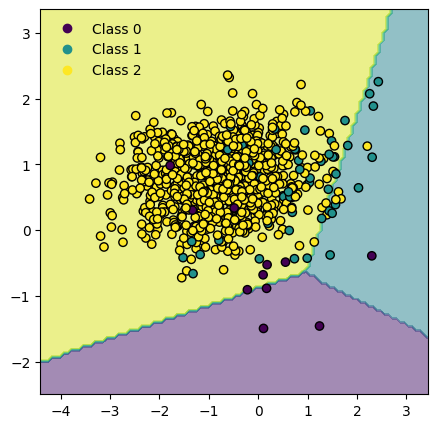

In [177]:
plt.figure(figsize=(5,5))
ax = plt.axes()
disp = DecisionBoundaryDisplay.from_estimator(clf, X, response_method="predict", alpha=0.5, ax=ax)
scatter=ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
handles, labels = scatter.legend_elements()
ax.legend(handles=handles, labels=["Class 0", "Class 1",  "Class 2"], frameon=False)

The decision function heavily favors the class with the larger number of samples, Class 2.

We see that from class 0 we have 13 examples, class 1, we have 55 examples and class 2,  we have 932 examples. This is the ratio we set using *weights* argument of *make_classification*.

Next, we will showcase a few methods for data balancing, implemented in `imblearn` library.

*Imblearn* library follows the *sklearn* approach, with the base *estimator* and adding a sampling functionality through the sample method:

- Estimator implements a *fit* method to learn from data.

- Resampler implements: *fit_resample* method.

## Under-sampling
Undersampling methods delete or select a subset of examples from the majority class. The simplest undersampling method involves randomly deleting examples from the majority class.
To perform under-sampling we can use `RandomUnderSampler`:

In [182]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(replacement=False, random_state=0)
X_resampled, y_resampled = rus.fit_resample( X, y)

The parameter *replacement=False* ensures that once a sample is selected to be part of the under-sampled majority class, it won't be selected again; thus, even though the majority class is being reduced, individual samples cannot appear multiple times in the resampled dataset.

Let's compare the number of instances in our original dataset *X*, and our subsampled dataset *X_resampled*:

In [185]:
print(X.shape)
print(X_resampled.shape)

(1000, 2)
(39, 2)


And now let's see the number of each example per class:

In [187]:
sorted(Counter(y_resampled).items())

[(0, 13), (1, 13), (2, 13)]

Notice that now all classes have the same number of examples as the minority class.
We could have set a different ratio by setting the parameter *sampling_strategy* of the `RandomUnderSampler`. The default value of this parameter is 'not minority', meaning resampling of all classes but the minority class is done.

Let's now visualize, side by side, the original dataset *X*, and our subsampled dataset *X_resampled*:

Text(0.5, 1.0, 'Dataset with under-sampling')

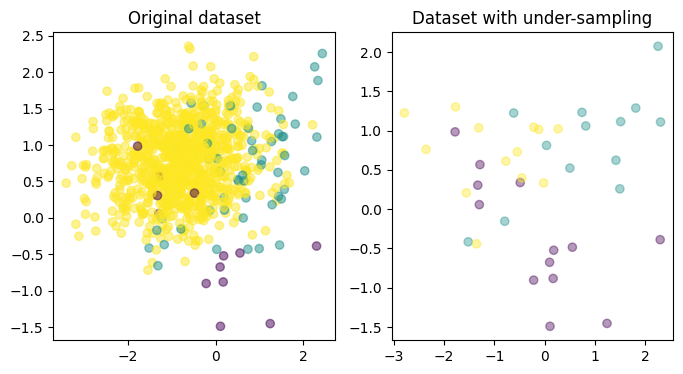

In [190]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
axs[0].scatter(X[:, 0], X[:, 1], alpha=0.5, c=y)
axs[0].set_title('Original dataset')

axs[1].scatter(X_resampled[:, 0], X_resampled[:, 1], alpha=0.4, c=y_resampled)
axs[1].set_title('Dataset with under-sampling')

Let's now see the decision function we learnt by fitting the sampled data to Logistic Regression. Note we will use the sampled data to learn the model, but we will plot the decision boundaries and the whole dataset.

Text(0.5, 1.0, 'Decision boundary with under-sampling')

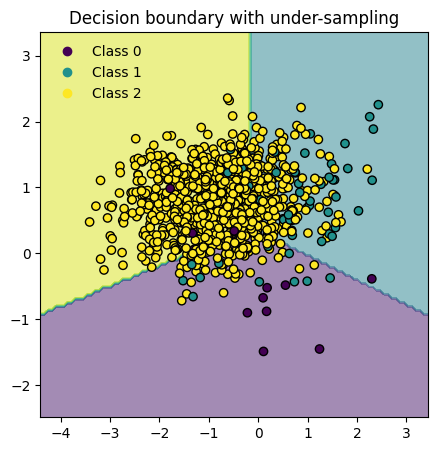

In [192]:
clf.fit(X_resampled, y_resampled)

plt.figure(figsize=(5,5))
ax = plt.axes()
disp = DecisionBoundaryDisplay.from_estimator(clf, X, response_method="predict", alpha=0.5, ax=ax)
scatter=ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
handles, labels = scatter.legend_elements()
ax.legend(handles=handles, labels=["Class 0", "Class 1",  "Class 2"], frameon=False)
ax.set_title('Decision boundary with under-sampling')

Now, the majority class does not take over the other classes during the training process, but the training of the model is done using very few data points.

## Over-sampling

Another way to deal with imbalanced data is to generate new samples of the classes which are under-represented. The most naive strategy is to generate new samples by randomly sampling with replacement the current available samples. The `RandomOverSampler` offers such scheme:

In [195]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)
print(X.shape)
print(X_resampled.shape)
sorted(Counter(y_resampled).items())

(1000, 2)
(2796, 2)


[(0, 932), (1, 932), (2, 932)]

Again, let's visualize the original and the sampled dataset:

Text(0.5, 1.0, 'Dataset with over-sampling')

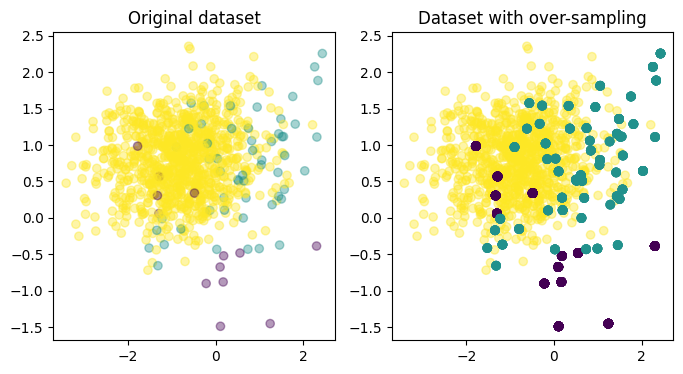

In [197]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
axs[0].scatter(X[:, 0], X[:, 1], alpha=0.4, c=y)
axs[0].set_title('Original dataset')

axs[1].scatter(X_resampled[:, 0], X_resampled[:, 1], alpha=0.4, c=y_resampled)
axs[1].set_title('Dataset with over-sampling')

The new samples generated are superimposing with the original samples, hence we see the same number of points on the second plot, but the color is darker, as multiple points are overlapping.

Let's now see the decision boundary:

Text(0.5, 1.0, 'Decision boundary with over-sampling')

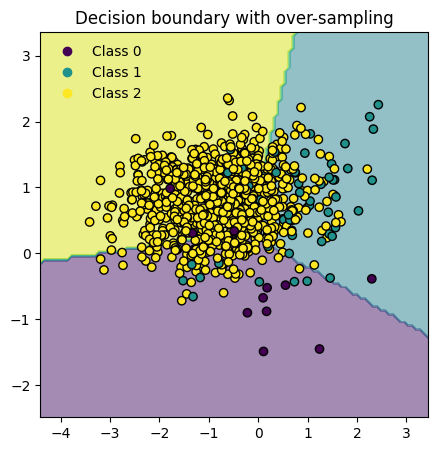

In [200]:
clf.fit(X_resampled, y_resampled)

plt.figure(figsize=(5,5))
ax = plt.axes()
disp = DecisionBoundaryDisplay.from_estimator(clf, X, response_method="predict", alpha=0.5, ax=ax)
scatter=ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
handles, labels = scatter.legend_elements()
ax.legend(handles=handles, labels=["Class 0", "Class 1",  "Class 2"], frameon=False)
ax.set_title('Decision boundary with over-sampling')

Again, the majority class does not take over the other classes during the training process. Consequently, all classes are represented by the decision function.

## SMOTE
Another popular methods to over-sample minority classes is the Synthetic Minority Oversampling Technique (SMOTE). While the `RandomOverSampler` is over-sampling by duplicating some of the original samples of the minority class, `SMOTE`  generates new samples in by interpolation.

### Numerical variables

In [204]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X, y)
print(X.shape)
print(X_resampled.shape)
print(sorted(Counter(y_resampled).items()))

(1000, 2)
(2796, 2)
[(0, 932), (1, 932), (2, 932)]


Now, let's see  our original and the sampled dataset:

Text(0.5, 1.0, 'Dataset with SMOTE')

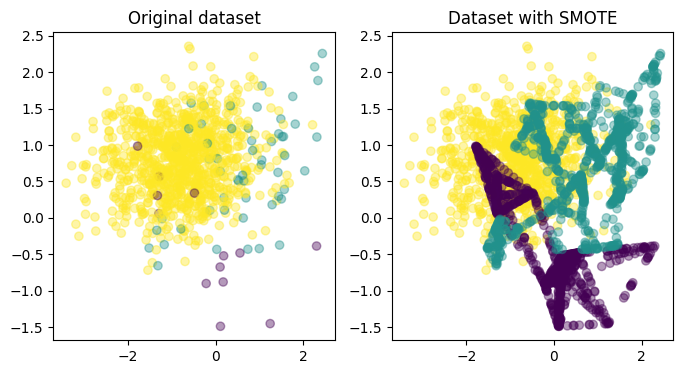

In [206]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
axs[0].scatter(X[:, 0], X[:, 1], alpha=0.4, c=y)
axs[0].set_title('Original dataset')

axs[1].scatter(X_resampled[:, 0], X_resampled[:, 1], alpha=0.4, c=y_resampled)
axs[1].set_title('Dataset with SMOTE')

Let's see the decision boundary found:

Text(0.5, 1.0, 'Decision boundary with SMOTE')

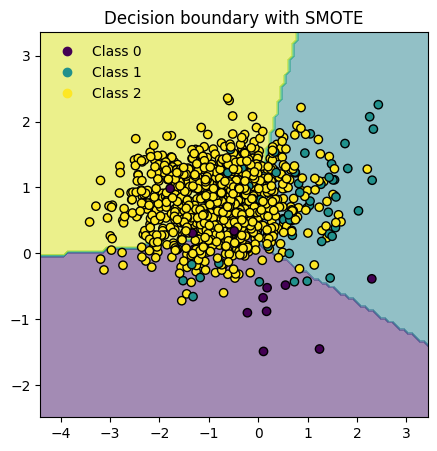

In [208]:
clf.fit(X_resampled, y_resampled)

plt.figure(figsize=(5,5))
ax = plt.axes()
disp = DecisionBoundaryDisplay.from_estimator(clf, X, response_method="predict", alpha=0.5, ax=ax)
scatter=ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
handles, labels = scatter.legend_elements()
ax.legend(handles=handles, labels=["Class 0", "Class 1",  "Class 2"], frameon=False)
ax.set_title('Decision boundary with SMOTE')

Note that SMOTE is based on finding the neighbors of data points based on distance calculations, hence doing scaling before applying SMOTE is recommended. When dealing with mixed data type such as continuous and categorical features, we need to use different versions of SMOTE.

### Categorical variables

For dealing with categorical features, extension of SMOTE, SMOTEN (SMOTE for Nominal) is used. Let's see a quick example. We will create 60 data points, with only one feature (X), with 20 of class 0 and 40 of class 1. The single feature could take values of "A", "B" or "C".


In [212]:
X = np.array(["A"] * 10 + ["B"] * 20 + ["C"] * 30, dtype=object).reshape(-1, 1)
y = np.array([0] * 20 + [1] * 40, dtype=np.int32)

Let's see the first 5 data points:

In [214]:
X[:5]

array([['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A']], dtype=object)

In [215]:
print(sorted(Counter(y).items()))

[(0, 20), (1, 40)]


Now, let's apply SMOTE for nominal features:

In [217]:
from imblearn.over_sampling import SMOTEN
sampler = SMOTEN(random_state=0)

X_res, y_res = sampler.fit_resample(X, y)

Let's see the new dataset:

In [219]:
print(sorted(Counter(y_res).items()))

[(0, 40), (1, 40)]


Now given that SMOTE is generates synthetic examples along the line segments joining k minority class nearest neighbors, how are these neighbors calculated if we only have categorical features? This is done using a special metric where categories with similar correlation with the target vector will be considered closer. A more detailed explanation can be found [here](https://imbalanced-learn.org/stable/references/generated/imblearn.metrics.pairwise.ValueDifferenceMetric.html#imblearn.metrics.pairwise.ValueDifferenceMetric).

### Mixed data types

When dealing with mixed data type such as continuous and categorical features, SMOTENC is used. Let's create a synthetic data set with 50 datapoints, one continuous and two categorical features:

In [223]:
rng = np.random.RandomState(42)
n_samples = 50
X = np.empty((n_samples, 3), dtype=object)

# first feature can take value A, B or C
X[:, 0] = rng.choice(['A', 'B', 'C'], size=n_samples).astype(object)

# second feature is numerical
X[:, 1] = rng.randn(n_samples)

# third feature can take values 1, 2 or 3
X[:, 2] = rng.randint(3, size=n_samples)

y = np.array([0] * 20 + [1] * 30)
print(sorted(Counter(y).items()))

[(0, 20), (1, 30)]


Let's see the first 5 data points:

In [225]:
X[:5]

array([['C', -0.14021849735700803, 2],
       ['A', -0.033193400066544886, 2],
       ['C', -0.7490765234433554, 1],
       ['C', -0.7783820070908942, 2],
       ['A', 0.948842857719016, 2]], dtype=object)

We need to pass the information to the SMOTENC which features are categorical, using the parameters `categorical_features`, either by passing the indices of these features or a boolean mask marking these features:

In [227]:
from imblearn.over_sampling import SMOTENC

smote_nc = SMOTENC(categorical_features=[0, 2], random_state=0)
X_resampled, y_resampled = smote_nc.fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))

[(0, 30), (1, 30)]


In [228]:
X_resampled[-5:]

array([['A', 0.1989993778979113, 2],
       ['B', -0.3657680728116921, 2],
       ['B', 0.8790828729585258, 2],
       ['B', 0.3710891618824609, 2],
       ['B', 0.3327240726719727, 2]], dtype=object)

The samples generated in the first and last columns are belonging to the same categories originally presented without any other extra interpolation.

To calculate the distances between the data points, in order to identify neighbors, SMOTENC computes the Euclidean distance between the feature vector using the continuous feature space. For every differing nominal feature between the considered feature vector and its potential nearest-neighbor, an additional calculation is made. More details can be found [here](https://www.cs.cmu.edu/afs/cs/project/jair/pub/volume16/chawla02a-html/node15.html).

 Oversampling and undersampling can also be extended to regression problems when relevant values of the target are underrepresented. A case in point would be the prediction of salaries, in which mid-range salaries are likely to be prevalent, yet instances of higher incomes would be much more rare, culminating in the model performing less optimally in this bracket. 

Imbalanced regression is a less commonly discussed topic than imbalanced classification, but unevenly distributed targets can often occur, and specific approaches can be considered for these situations: aside from other methods like altering the target's distribution to be closer to the Gaussian's or adopting scoring functions that focus on rare instances, an example pertaining to sampling is SMOGN that removes samples of the majority class and creates new samples of the minority class through interpolation (with the addition of noise). More details can be found [here](https://github.com/nickkunz/smogn).

## Avoiding data leakage with pipeline

Special attention must be paid when data set balancing is done. Data balancing is only performed on the training dataset in order for the algorithm to learns a model. 
**Balancing is not performed on the holdout test or test dataset**. 
Doing the balancing on the entire dataset before splitting it into a train and a test partitions leads to two problematic issues:
- The resampling procedure might use information about test samples to either generate or select some of the samples for training. 
- The model will not be tested on a dataset with class distribution similar and representative to the real use-case:  misleading and perhaps overly optimistic estimation of performance.


While it is a pretty straightforward conclusion that the dataset balancing should be done only after the train test split, balancing the training set is problematic if we decide to do cross-validation. Why is that? Recall that in cross-validation, folds of the training dataset will be used for training and also for validation.  `imblearn.Pipeline` object allows us to apply dataset balancing only to the training folds.

Let's now import an unbalanced dataset using `sklearn`'s `fetch_openml`, which can fetch a dataset from https://www.openml.org/ by name or dataset id.

In [236]:
from sklearn.datasets import fetch_openml
data = fetch_openml('mammography', as_frame=True, parser='auto')
X, y = data.data, data.target
X.shape

(11183, 6)

Let's check the class distribution:

In [238]:
y.value_counts()

class
-1    10923
1       260
Name: count, dtype: int64

Let's change y to have classes 0 and 1 (instead of -1 and 1) to allow *sklearn* to determine the positive class more easily. We will use `.cat.rename_categories` pandas function for renaming categories:

In [240]:
y = y.cat.rename_categories({'-1': 0, '1': 1})
y.value_counts()

class
0    10923
1      260
Name: count, dtype: int64

In [241]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

As in *scikit-learn*, in *imbalanced-learn*, we will be using a *Pipeline* to avoid data leakage. **A traditional *scklearn* Pipeline cannot be used with sampling methods.**

In [243]:
from imblearn.pipeline import Pipeline 

undersample_pipe = Pipeline([('sampling', RandomUnderSampler()), 
                             ('classifier', LogisticRegression(solver='liblinear'))])

Note that the pipeline, when used in cross validation, first splits into training and validation folds, and then applies sampling subsequently only to the training ones. When called `predict` on a `imblearn.Pipeline` object, it will skip the sampling method and leave the data as it is to be passed to next transformer. Hence,  we train the dataset on the sampled data, but evaluate on non-sampled data. You can also consult the following [link](https://kiwidamien.github.io/how-to-do-cross-validation-when-upsampling-data.html) for more details.

To check the performance of our pipeline we will use `cross_validate` function:

In [246]:
from sklearn.model_selection import cross_validate
scores = cross_validate(undersample_pipe,
                        X_train, y_train, cv=10,
                        scoring=('roc_auc', 'recall','precision'))

`Cross_validate` returns a dictionary of arrays containing the following metrics: 

In [248]:
scores.keys()

dict_keys(['fit_time', 'score_time', 'test_roc_auc', 'test_recall', 'test_precision'])

Let's check the mean of these metrics on the hold out folds:

In [250]:
print('ROC AUC is', scores['test_roc_auc'].mean())
print('Recall is ', scores['test_recall'].mean())
print('Precision is', scores['test_precision'].mean())

ROC AUC is 0.9182325497922417
Recall is  0.8621052631578946
Precision is 0.1638931157208967


Now, let's put together sampling and model tuning. Recall that we can use *get_params()* to see the names of all the parameters of an estimator.

In [252]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler

pipe = Pipeline([
    ('scaling', StandardScaler()), 
    ('sampling', SMOTE()), 
    ('classifier', LogisticRegression(solver='liblinear'))])

pipe.get_params()

{'memory': None,
 'steps': [('scaling', StandardScaler()),
  ('sampling', SMOTE()),
  ('classifier', LogisticRegression(solver='liblinear'))],
 'transform_input': None,
 'verbose': False,
 'scaling': StandardScaler(),
 'sampling': SMOTE(),
 'classifier': LogisticRegression(solver='liblinear'),
 'scaling__copy': True,
 'scaling__with_mean': True,
 'scaling__with_std': True,
 'sampling__k_neighbors': 5,
 'sampling__random_state': None,
 'sampling__sampling_strategy': 'auto',
 'classifier__C': 1.0,
 'classifier__class_weight': None,
 'classifier__dual': False,
 'classifier__fit_intercept': True,
 'classifier__intercept_scaling': 1,
 'classifier__l1_ratio': None,
 'classifier__max_iter': 100,
 'classifier__multi_class': 'deprecated',
 'classifier__n_jobs': None,
 'classifier__penalty': 'l2',
 'classifier__random_state': None,
 'classifier__solver': 'liblinear',
 'classifier__tol': 0.0001,
 'classifier__verbose': 0,
 'classifier__warm_start': False}

In [253]:
param_grid = {'classifier__penalty': ["l1","l2"],
        'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
        }
grid = GridSearchCV(pipe, param_grid, cv=10, scoring = 'recall', n_jobs=-1)
grid.fit(X_train, y_train)
print('Best cross-validation score: ', grid.best_score_)
print('Best params:' , grid.best_params_)

Best cross-validation score:  0.8726315789473684
Best params: {'classifier__C': 0.001, 'classifier__penalty': 'l2'}


We could also use the `Pipeline` to test which sampling method gives the best performance (according to the scoring method we choose):

In [255]:
pipe = Pipeline([
    ('scaling', StandardScaler()), 
    ('sampling', RandomOverSampler()),
    ('classifier', LogisticRegression(solver='liblinear'))])

param_grid = [
    {'classifier': [LogisticRegression(solver='liblinear')], 
     'sampling': [None, RandomUnderSampler(), RandomOverSampler(), SMOTE()],
     'classifier__penalty': ["l1","l2"], 
     'classifier__C':  [0.001, 0.01, 0.1, 1, 10, 100]}]

grid = GridSearchCV(pipe, param_grid, cv=10, scoring = 'recall', n_jobs=-1)
grid.fit(X_train, y_train)

print('Best cross-validation score: ', grid.best_score_)
print('Best params:' , grid.best_params_)

Best cross-validation score:  0.9186842105263159
Best params: {'classifier': LogisticRegression(solver='liblinear'), 'classifier__C': 0.001, 'classifier__penalty': 'l2', 'sampling': RandomUnderSampler()}


## Adjusting weights of the minority class

Class imbalance often leads to models that are biased towards the majority class, as the learning process may prioritize minimizing errors on the dominant class(es). By adjusting the weights, models can give more importance to the minority class, encouraging the model to pay more attention to these instances during the training process.

In XGBoost a parameter that adjusts class weighting is `scale_pos_weight`.  Typically, it is set as the ratio of number of instances od negative class to the positive class:

`scale_pos_weight`=$\frac{\text{Number of Negative Samples}}{\text{Number of Positive Samples}}$



Here is an illustrative examples using a toy imbalanced dataset.

In [260]:
X, y = make_classification(n_samples=10000, n_features=20, n_classes=2, 
                           weights=[0.95, 0.05], random_state=42)

Let's check the class distribution in the original dataset.

In [262]:
pd.Series(y).value_counts(normalize=True)

0    0.946
1    0.054
Name: proportion, dtype: float64

We will use stratified split to ensure that both the training and the test set maintain the same proportion of classes as in the original dataset.

In [264]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

We will confirm that the class distribution stays the same after the split in both training and the test dataset:

In [266]:
pd.Series(y_train).value_counts(normalize=True)

0    0.946
1    0.054
Name: proportion, dtype: float64

In [267]:
pd.Series(y_test).value_counts(normalize=True)

0    0.946
1    0.054
Name: proportion, dtype: float64

Now, sinc ethe goal is just to illustrate the use of the weighing parameter, we will not tune the model, though in practice, we should always do so. First we will train an ordinary xgboost that weighs both classes the same.

In [269]:
model_default = XGBClassifier( random_state=42)
model_default.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Next we will set the weight as the ratio of data points in class 0 and the datapoints of class 1:

In [271]:
scale_pos_weight = np.sum(y_train == 0) / np.sum(y_train == 1)
scale_pos_weight

17.51851851851852

By default, the `scale_pos_weight` hyperparameter is set to the value of 1 and has the effect of weighing the balance of positive examples, relative to negative examples when boosting decision trees. Next, we train another XGboost model, but this time specifying weight higher than 1 for positive class, which increases the penalty for misclassifying this class.

In [273]:
model_weighted = XGBClassifier( scale_pos_weight=scale_pos_weight, random_state=42)
model_weighted.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Let's evaluate both of these models:

In [275]:
y_pred_default = model_default.predict(X_test)
y_pred_weighted = model_weighted.predict(X_test)

print("Model without scale_pos_weight:")
print(classification_report(y_test, y_pred_default))

print("Model with scale_pos_weight:")
print(classification_report(y_test, y_pred_weighted))


Model without scale_pos_weight:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1892
           1       0.69      0.46      0.56       108

    accuracy                           0.96      2000
   macro avg       0.83      0.73      0.77      2000
weighted avg       0.96      0.96      0.96      2000

Model with scale_pos_weight:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1892
           1       0.59      0.56      0.57       108

    accuracy                           0.95      2000
   macro avg       0.78      0.77      0.77      2000
weighted avg       0.95      0.95      0.95      2000



Both models preform really well on this toy problem, but the weighted model (with scale_pos_weight) slightly improves recall, 0.56 compared to 0.46 for the minority class (fewer false negatives).
However, it also slightly reduced precision, since the model is more sensitive to positive cases, and the precision falls from 0.69 to 0.59.

This heuristic for setting the scale_pos_weight is effective for many situations. However, it is possible that better performance can be achieved with a different class weighting, and this too will depend on the choice of performance metric used to evaluate the model. Hence, the value of this hyperparameter should be tuned with cross validation.